# Exploratory Data Analysis (EDA)

In this study, EDA is performed on the data set of a Kaggle project "House Prices: Advanced Regression Techniques". The focus is on the following:  
* Finding out the missing values.
* Recognizing the numerical and the categorical features.
* Visualizing the distribution of the numerical features.
* Finding the cardinality of the categorical features.
* Visualizing the relationship between the independent and the dependent (SalePrice) variables.
* Detecting the outliers.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns', None)
#%matplotlib inline


In [2]:
# reading the data

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
print('Training data shape: {}\n'.format(train.shape))
print('Test data shape: {}\n'.format(test.shape))

Training data shape: (1460, 81)

Test data shape: (1459, 80)



In [3]:
# concatinating train and test data for better EDA
data = pd.concat([train, test], axis = 0).reset_index(drop = True)
print('Overall data shape: {}\n'.format(data.shape))
data.head()

Overall data shape: (2919, 81)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


This data set has total 79 independent features (excluding Id) and one dependent feature (SalePrice), which is required to be predicted.

In [4]:
# droping the Id column and SalePrice column
data.drop(['Id', 'SalePrice'], axis = 1, inplace= True)

## 1. Missing Values

In [5]:
missing = data.isnull().sum()
missing = missing[missing > 0]
print('Features having missing values:\n\n {}\n'.format(list(missing.index)))
print('Total features having missing values: {}\n'.format(len(missing)))
missing_percent = ( missing/(len(data)) )*100
for col in missing_percent.index:
    print('Percentage of missing values in the feature {} is {:.2f} %'.format(col, missing_percent[col]))

Features having missing values:

 ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']

Total features having missing values: 34

Percentage of missing values in the feature MSZoning is 0.14 %
Percentage of missing values in the feature LotFrontage is 16.65 %
Percentage of missing values in the feature Alley is 93.22 %
Percentage of missing values in the feature Utilities is 0.07 %
Percentage of missing values in the feature Exterior1st is 0.03 %
Percentage of missing values in the feature Exterior2nd is 0.03 %
Percentage of missing values in the feature MasVnrType is 0.82 

[Text(0, 0.5, '% age of missing values'),
 Text(0.5, 0, 'Features'),
 Text(0.5, 1.0, '% age of Missing Values')]

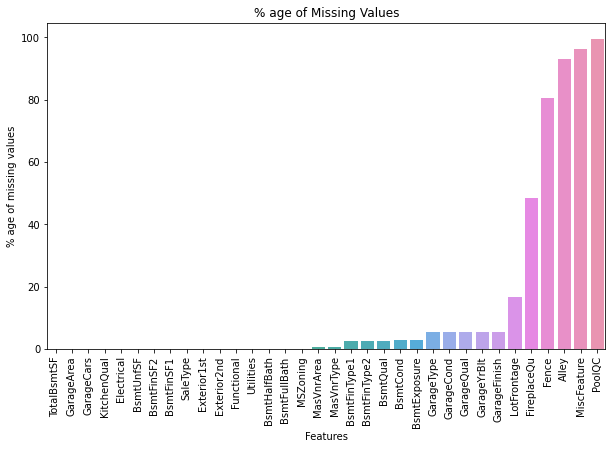

In [6]:
# visualizing the number of missing values
missing_percent = missing_percent.sort_values()
plt.figure(figsize = (10,6))
g = sns.barplot(x = missing_percent.index, y = missing_percent)
plt.xticks(rotation = 90)
g.set(xlabel = 'Features', ylabel = '% age of missing values', title = '% age of Missing Values')


## 2. Numerical Features

In [7]:
num_feat = [col for col in data.columns if data[col].dtype != 'O']
print('Number of numerical features {}'.format(len(num_feat)))
num_data = data[num_feat].copy()
num_data.head()

Number of numerical features 36


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008


### 2.1. Temporal Features

In [8]:
# in this data set, the temporal features have 'Year' or 'Yr' in their name.
temporal_feat = [col for col in num_data.columns if ('Year' in col or 'Yr' in col)]
temporal_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

#### 2.1.1. Relation between Temporal Features and the Target (SalePrice)

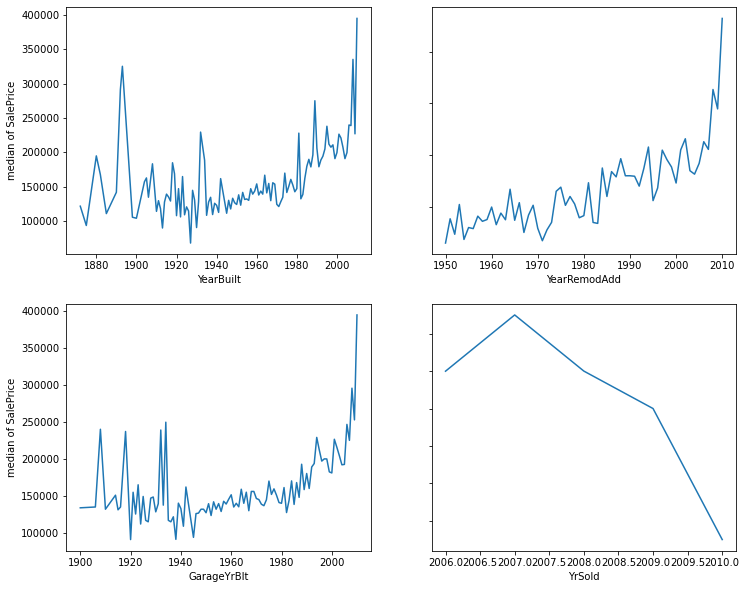

In [9]:
f, axes = plt.subplots(2,2, figsize = (12,10))
locations = [(0,0), (0,1), (1,0), (1,1)]
for i in range(len(temporal_feat)):    
    train.groupby(temporal_feat[i])['SalePrice'].median().plot( sharey = True, ax =  axes[locations[i]])
    axes[locations[i]].set_ylabel('median of SalePrice')
   

SalePrice vs. YrSold shows that the price of houses has declined over time. In reality, this is usually not true because the price of houses usually increases over time. This behaviour is because of the fact that we are looking at one aspect. If a house is sold in 2010 but it was build in 1960, then the price will be low because the house is very old. On the other hand, if a house is sold in 2010 but it was built in 2005, then the price will be high because the house is comparitively new. So, we might need to do some kind of feature engineering for the temporal features.

### 2.2. Discrete Numerical Features

In [10]:
# to flag a numerical feature as discrete, I am using an assumption that it should have less than 20 unique values.

disc_num_feat = [col for col in num_feat if ( data[col].value_counts().count() <=20 and col not in temporal_feat)]
print('Total discrete numerical features: {}\n'.format(len(disc_num_feat)))

disc_num_data = data[disc_num_feat].copy()
disc_num_data.head()

Total discrete numerical features: 14



,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1.0,0.0,2,1,3,1,8,0,2.0,0,2
1,20,6,8,0.0,1.0,2,0,3,1,6,1,2.0,0,5
2,60,7,5,1.0,0.0,2,1,3,1,6,1,2.0,0,9
3,70,7,5,1.0,0.0,1,0,3,1,7,1,3.0,0,2
4,60,8,5,1.0,0.0,2,1,4,1,9,1,3.0,0,12


#### 2.2.1. Relation between the Discrete Numerical Features and the Target (SalePrice)

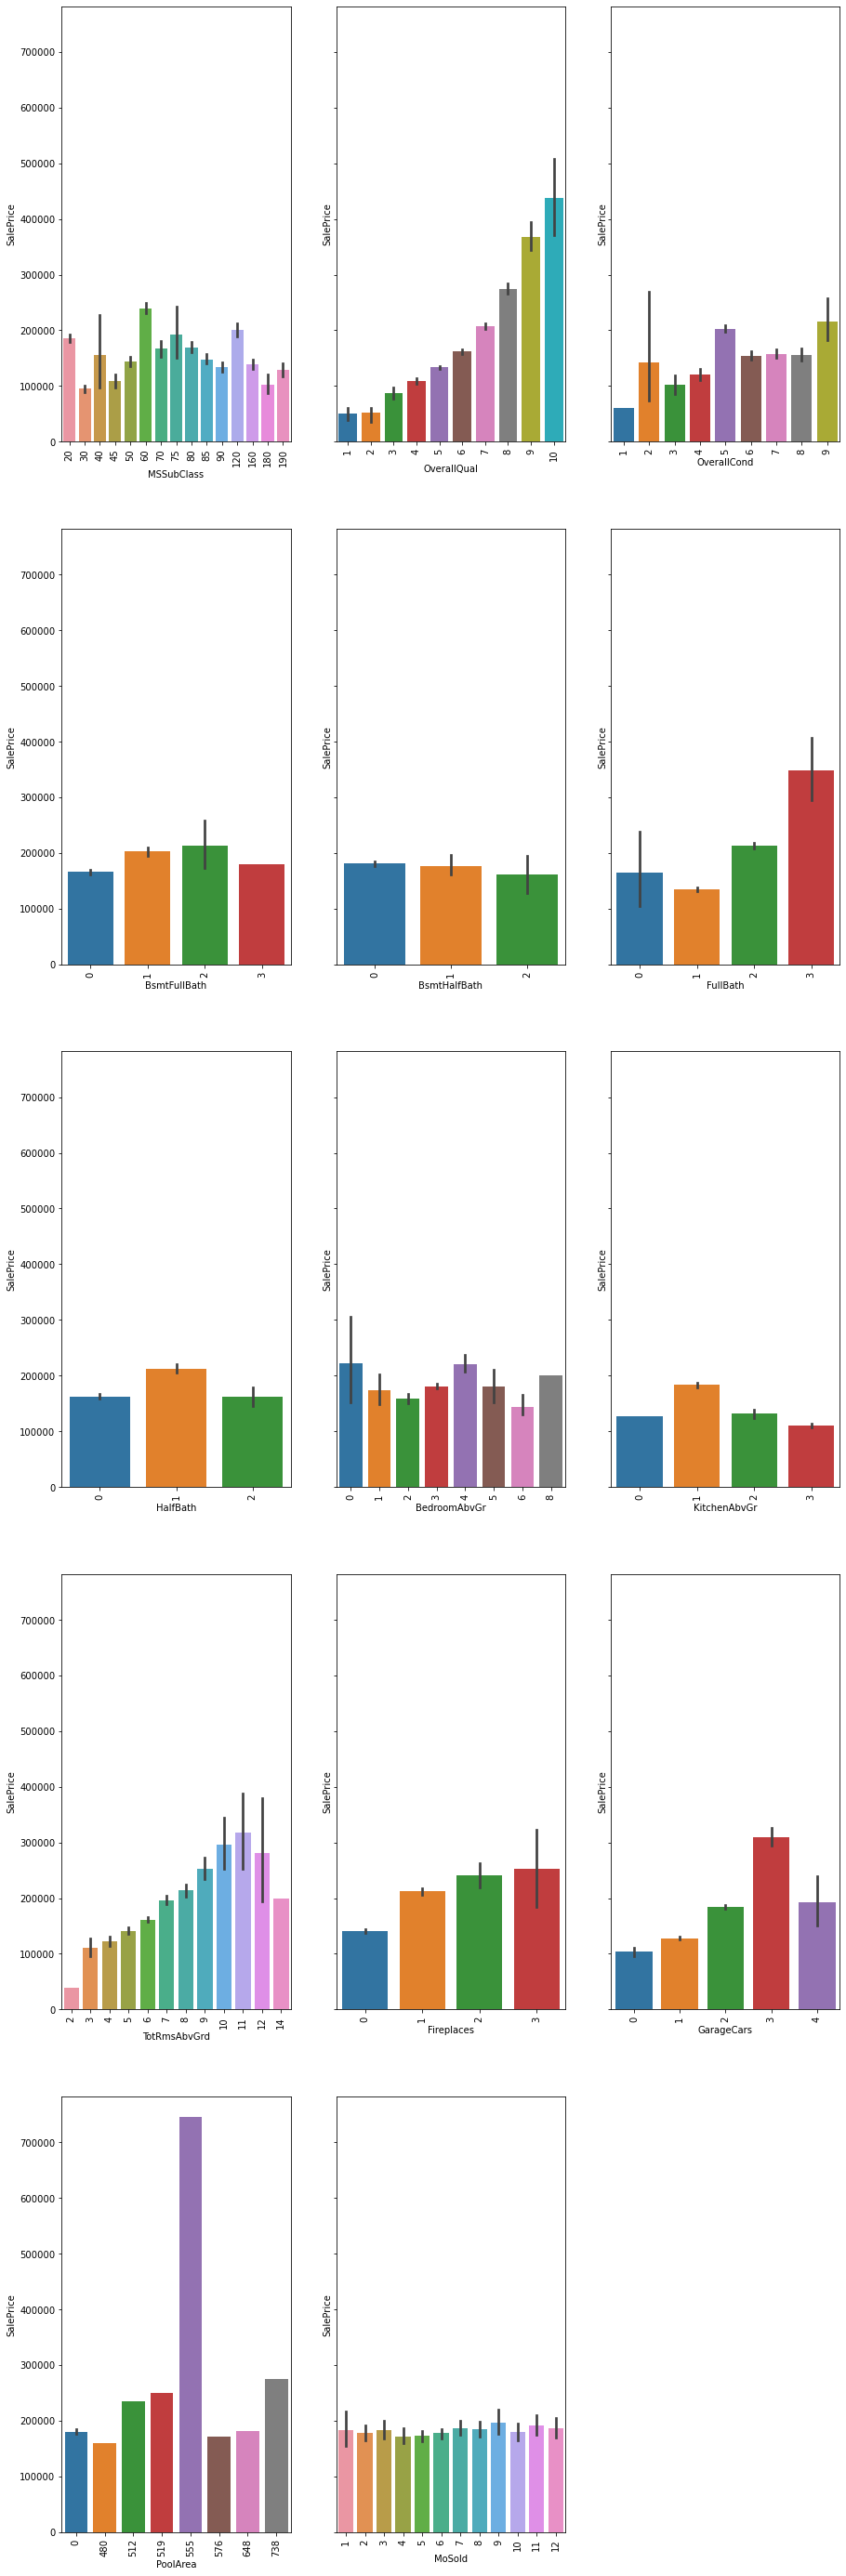

In [11]:
# defining number of rows and columns for subploting

cols = 3
rows = 5
feature_counter = 0         # to iterate over the discrete numerical features
f2, axes2 = plt.subplots(rows, cols, sharey = True, figsize = (15,50))
for row in range(rows):
    for col in range(cols):
        if row == 4 and col == 2:
            f2.delaxes(axes2[row, col])
        
        else:
            g = sns.barplot(x = train[disc_num_feat[feature_counter]], 
                            y = train['SalePrice'],
                            ax = axes2[row, col])
            axes2[row, col].set_xticklabels(axes2[row, col].get_xticklabels(), rotation=90)
            feature_counter += 1


The above plots show the unique values in each discrete numerical feature and the corresponding mean SalePrice (height of the bar). The vertical black lines on the bars are the error bars which show the confidence interval.

### 2.3. Continuous Numerical Features  
For the continuous numerical features, it is interesting to check their distribution. If they do not have a Normal distribution, some transformation might be required in feature engineering.

In [12]:
cont_num_feat = [i for i in num_feat if (i not in temporal_feat and i not in disc_num_feat)]
print('Total continuous numerical features are {}.\n'.format(len(cont_num_feat)))
data[cont_num_feat].head()

Total continuous numerical features are 18.



,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,548.0,0,61,0,0,0,0
1,80.0,9600,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,460.0,298,0,0,0,0,0
2,68.0,11250,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,608.0,0,42,0,0,0,0
3,60.0,9550,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,642.0,0,35,272,0,0,0
4,84.0,14260,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,836.0,192,84,0,0,0,0


#### 2.3.1. Distribution of Continuous Numerical Features

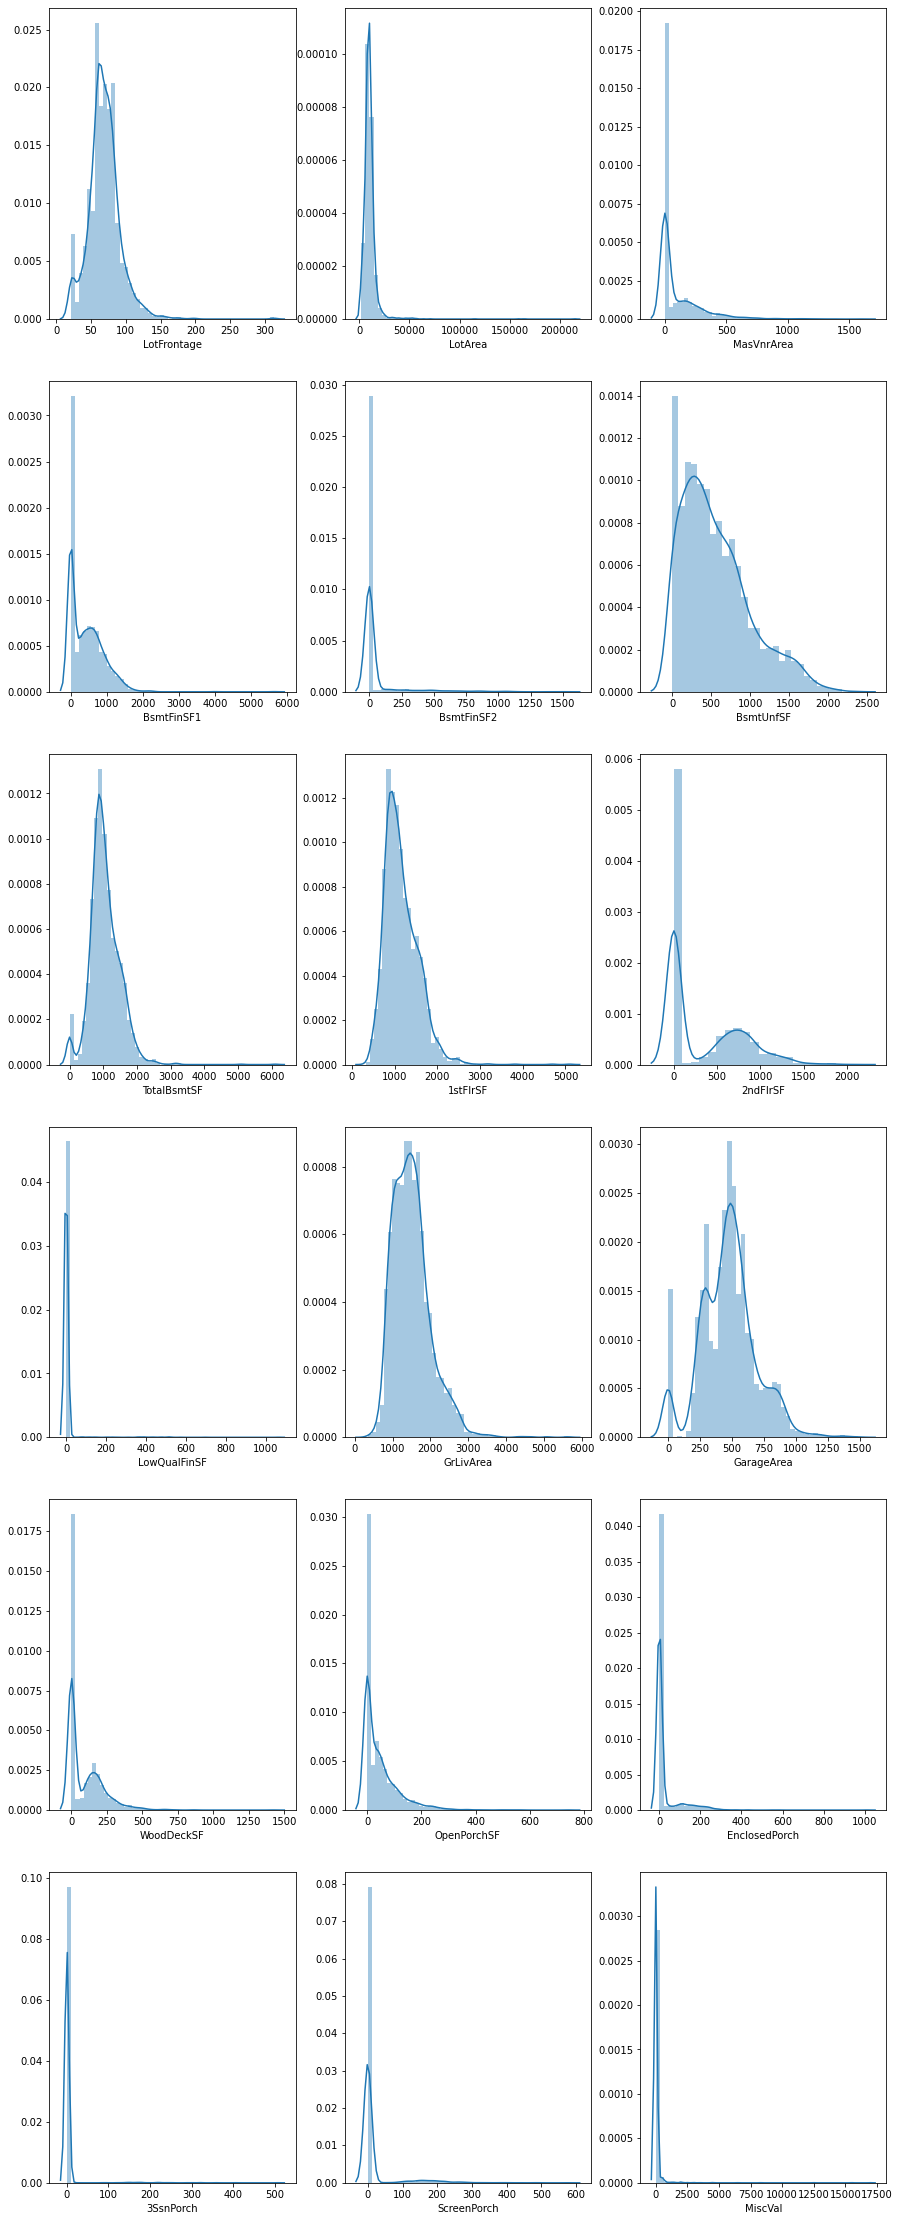

In [13]:
# visualizing the distribution for the continuous numerical features
# defining rows and columns for subploting

rows = 6
cols = 3
feature_counter = 0     # to iterate over the features
f3, axes3 = plt.subplots(rows, cols, figsize = (15,40))

for row in range(rows):
    for col in range(cols):
        sns.distplot(data[cont_num_feat[feature_counter]], ax = axes3[row, col])
        feature_counter += 1

#### 2.3.2. Outliers in Continuous Numerical Features  
Box plots can be used to show the outliers.

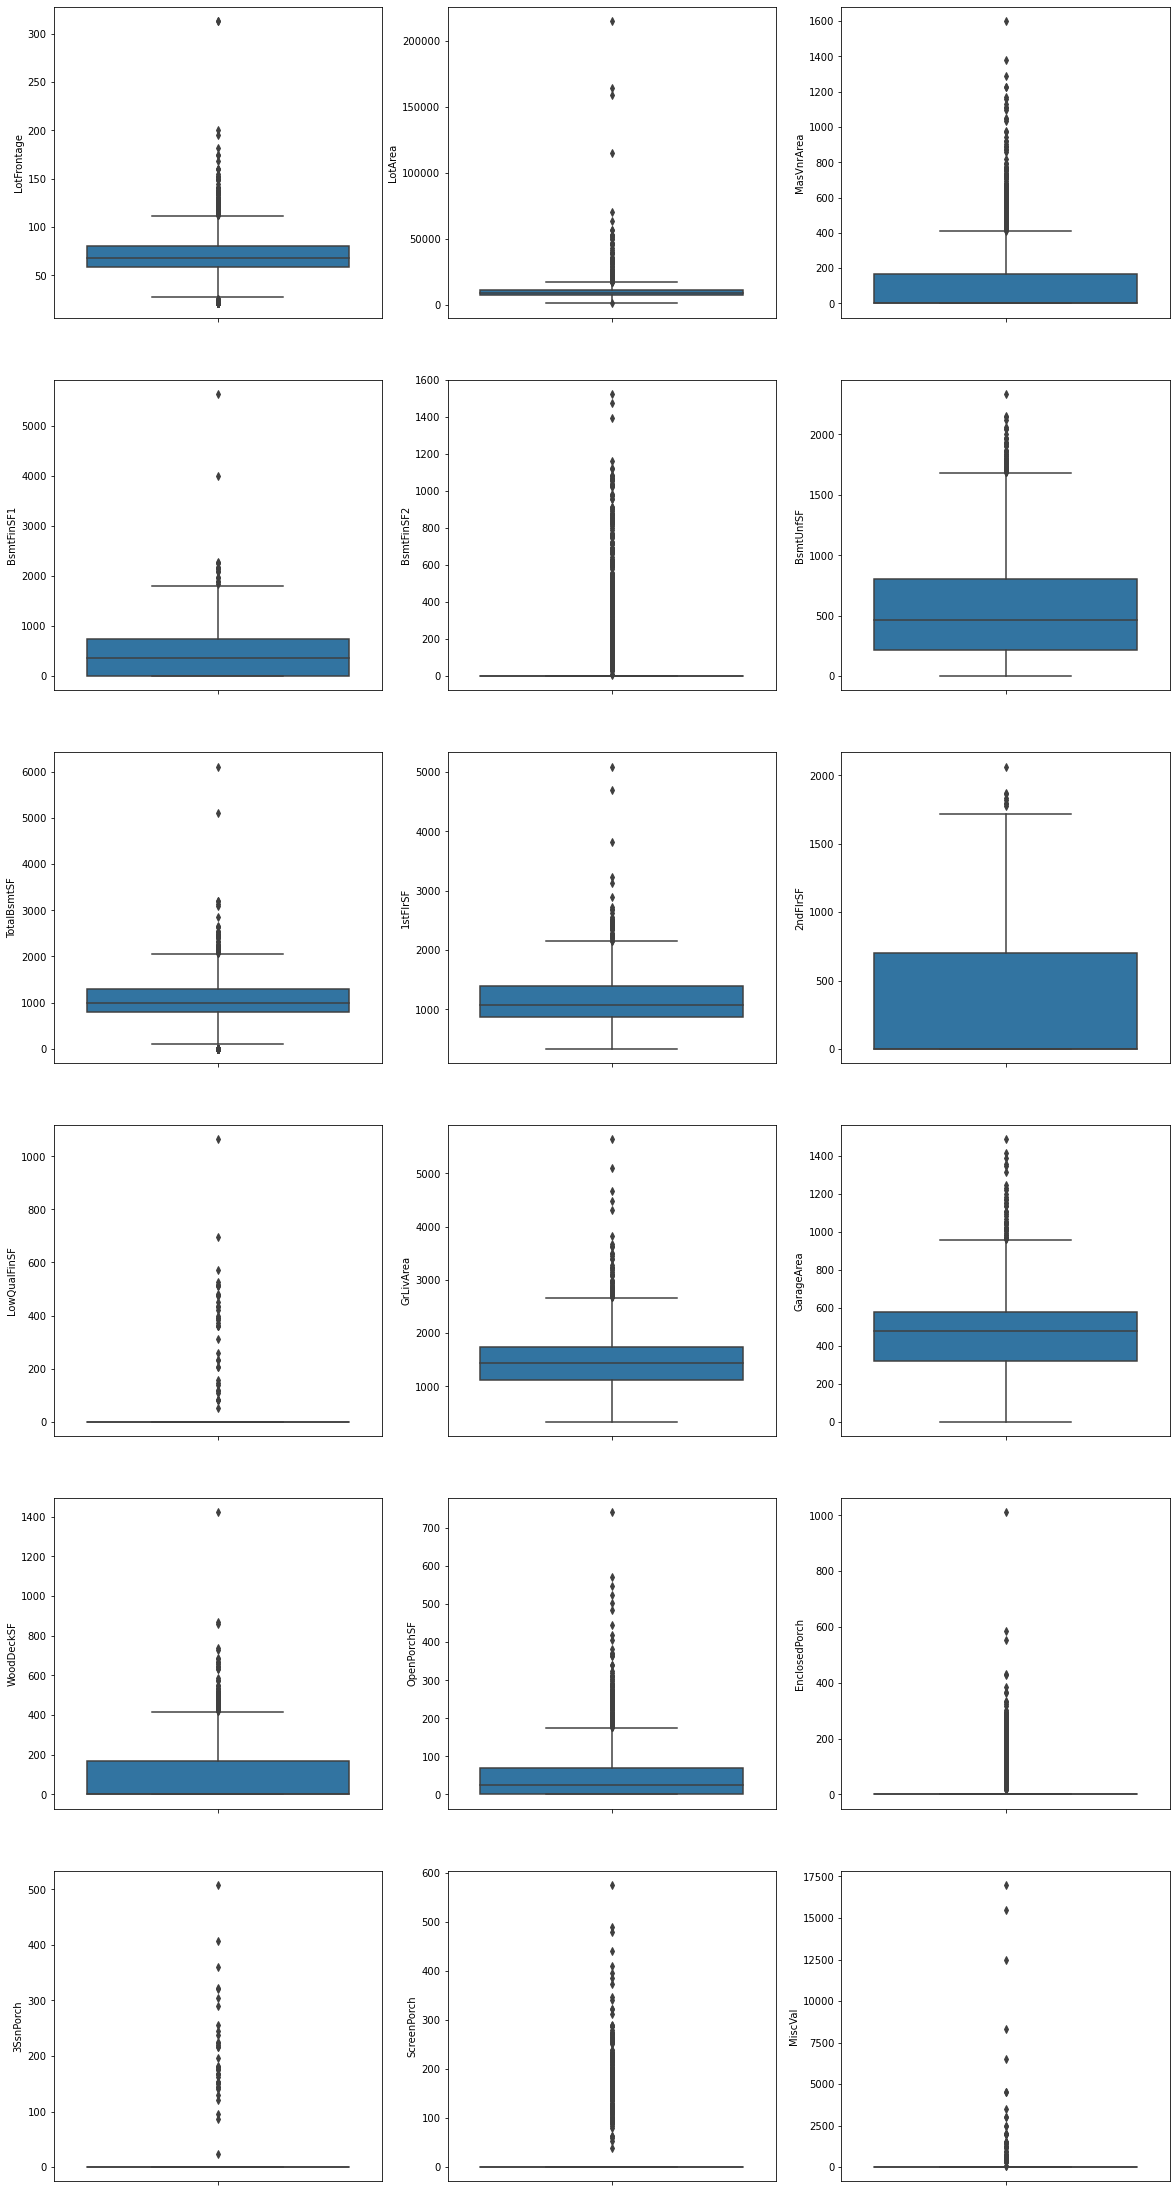

In [14]:
# defining rows and columns for subploting

rows = 6
cols = 3
feature_counter = 0     # to iterate over the features
f4, axes4 = plt.subplots(rows, cols, figsize = (20,40))

for row in range(rows):
    for col in range(cols):
        sns.boxplot(data[cont_num_feat[feature_counter]], orient = 'v', ax = axes4[row, col])
        feature_counter += 1

#### 2.3.3. Observations  
The above distribution and the box plots show that we need to do (log) transformation on the continuous numerical features in feature engineering part.


## 3. Categorical Features

In [15]:
cat_feat = [col for col in data.columns if data[col].dtype == 'O']
print('Total number of categorical features are {}.\n'.format(len(cat_feat)))

data[cat_feat].head()
      

Total number of categorical features are 43.



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### 3.1. Cardinality of the Categorical Features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

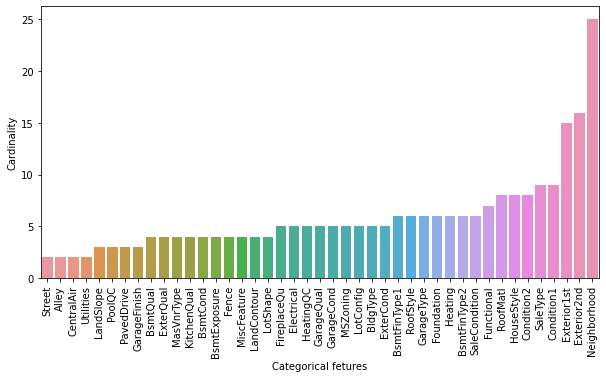

In [16]:
cat_feat_cardinality = [data[cat].value_counts().count() for cat in cat_feat]

cat_feat_series = pd.Series(cat_feat_cardinality, index = cat_feat)
cat_feat_series = cat_feat_series.sort_values()
plt.figure(figsize = (10,5))
sns.barplot(x = cat_feat_series.index, y = cat_feat_series)
plt.xlabel('Categorical fetures')
plt.ylabel('Cardinality')
plt.xticks(rotation = 90)


## 4. Conclusion  
The exploratory data analysis is very helpful to understand the various features involved in the data set. It gives an insight about what we should be focussing on in the feature engineering part. For example:
* Handle the found missing values.
* Do log transformation on the numerical features.
* Rescaling the continuous numerical features
* Encoding for the categorical features.